#### Installing Packages

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#### Importing Libraries

In [1]:
# Impoting panda Libraries
import numpy as np
import pandas as pd


In [2]:
# Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Importing libraries for text mining and sentiment analysis
import re
import string
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Importing data

In [4]:
# Read in data
tourist = pd.read_csv("tourist_accommodation_reviews.csv",encoding ='cp1252')

# Inspecting the first 5 rows
tourist.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [8]:
# Counting the number of reviews in the dataset
tourist.shape

(53644, 5)

In [9]:
#Checking the number of hotels/restaurants in the dataframe
tourist["Location"].value_counts().count()

25

In [10]:
# Counting the distinct locations in the data
tourist["Location"].value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

## Selecting the top 30 hotels in Patong with the highest number of reviews 

In [11]:
# Selecting the hotels in Patong
Hotels_in_Patong = tourist[tourist["Location"] == " Patong"].groupby("Hotel/Restaurant name").size().sort_values(ascending=False)

# Selecting the top 30 hotels with the highest number of reviews
Hotels_in_Patong = Hotels_in_Patong.head(30).rename_axis('hotel').reset_index(name='count').drop('count',axis=1)

#Viewing the data
Hotels_in_Patong


,hotel
0,No.6 Restaurant
1,Da Mario
2,3 Spices Restaurant
3,Royal India Restaurant Patong
4,Pum Thai Restaurant
5,Restaurant Break Point
6,Restaurant at Lillo Island Resort
7,Roma Ristorante & Pizzeria Da Mauro
8,Rosco's Restaurant & Sports Bar
9,"Ruen Thai, Patong"


In [177]:
#Filtering the data with the original dataset
Hotels_in_Patongg_30 = tourist[tourist["Hotel/Restaurant name"].isin(Hotels_in_Patong["hotel"])]

Hotels_in_Patongg_30

,ID,Review Date,Location,Hotel/Restaurant name,Review
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...
...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,Every time I visit Phuket I used to pass by th...
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,Had my dinner last week with family. ordered f...
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,After 27 years of dining at Patong Seafood I w...
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,So damn over priced... We ordered a shrimp cur...


In [178]:
##  Exploratory Analysis

In [179]:
#Checking the number of hotels/restaurants in the dataframe
Hotels_in_Patongg_30["Hotel/Restaurant name"].value_counts().count()

30

In [180]:
# Checking the dimensionality
Hotels_in_Patongg_30.shape

(3379, 5)

In [181]:
#Check the structure of the dataframe
Hotels_in_Patongg_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3379 entries, 793 to 52659
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     3379 non-null   object
 1   Review Date            3379 non-null   object
 2   Location               3379 non-null   object
 3   Hotel/Restaurant name  3379 non-null   object
 4   Review                 3379 non-null   object
dtypes: object(5)
memory usage: 158.4+ KB


In [182]:
# Exploring the missing values in the dataset
Hotels_in_Patongg_30.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [183]:
# Reviewing the dataset statistics
Hotels_in_Patongg_30.describe(include= 'all').transpose()

,count,unique,top,freq
ID,3379,3229,rn516885947,6
Review Date,3379,1132,Reviewed 4 weeks ago,46
Location,3379,3,Patong,3187
Hotel/Restaurant name,3379,30,Da Mario,279
Review,3379,3229,Had dinner at their Karon Beach branch. The fo...,6


In [184]:
# Checking the length of the reviews before preprocessing
Hotels_in_Patongg_30["Length of Reviews"] = Hotels_in_Patongg_30["Review"].apply(len)

Hotels_in_Patongg_30

C:\Users\Dell\AppData\Local\Temp\ipykernel_16092\1621683430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hotels_in_Patongg_30["Length of Reviews"] = Hotels_in_Patongg_30["Review"].apply(len)


,ID,Review Date,Location,Hotel/Restaurant name,Review,Length of Reviews
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,262
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,234
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",294
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,257
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,165
...,...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,Every time I visit Phuket I used to pass by th...,251
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,Had my dinner last week with family. ordered f...,251
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,After 27 years of dining at Patong Seafood I w...,236
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,So damn over priced... We ordered a shrimp cur...,259


In [ ]:
#Making a copy of the dataframe
tourist_df = Hotels_in_Patongg_30.copy()

# Data Pre-processing

In [194]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

##### Remove extra white spaces

In [196]:
def remove_extra_whitespace(text):
    text = ' '.join(text.split())
    return text

In [197]:
tourist_df['Review'] = tourist_df['Review'].apply(remove_extra_whitespace)

tourist_df.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Length of Reviews
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,262
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,234
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",294
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,257
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,165


##### Removing specific Words from the reviews

In [198]:
specific_words = ['hotel', 'restaurant', 'hotels','restaurants','Patong','trip','thai', 'food', 'Food']

In [199]:
tourist_df['Review'] = tourist_df['Review'].apply(lambda x: ' '.join([w for w in x.split() if w not in specific_words]))
tourist_df['Review'].head()

793    its very expensive in comparison to other loca...
794    We walked passed the holiday inn and decided a...
795    An atmosphere of the 70's, great comfort of th...
796    We made a reservation at the last minute to di...
797    We had a very great time to celebrate my son b...
Name: Review, dtype: object

##### Defining a function that performs tokenization, stop word removal and stemming

In [200]:
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+'). tokenize(text) #Tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
  return stemmed_text

In [201]:
# Applying the preprocess_text function
tourist_df['Review'] = tourist_df['Review'].apply(preprocess_text)

In [202]:
# Checking the length of the reviews after preprocessing
tourist_df["New Length of Reviews"] = tourist_df["Review"].apply(len)

tourist_df

,ID,Review Date,Location,Hotel/Restaurant name,Review,Length of Reviews,New Length of Reviews
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,"[expens, comparison, local, that', appl, orang...",262,21
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,"[walk, pass, holiday, inn, decid, last, minut,...",234,20
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"[atmospher, 70', great, comfort, armchair, eff...",294,28
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"[made, reserv, last, minut, dine, sam, stay, f...",257,21
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,"[great, time, celebr, son, birthday, phuket, s...",165,15
...,...,...,...,...,...,...,...
52655,rn403882083,"Reviewed August 10, 2016",Patong,Patong Seafood,"[everi, time, visit, phuket, use, pass, place,...",251,19
52656,rn401102476,"Reviewed August 3, 2016",Patong,Patong Seafood,"[dinner, last, week, famili, order, fish, praw...",251,26
52657,rn397958097,"Reviewed July 27, 2016",Patong,Patong Seafood,"[27, year, dine, seafood, never, go, back, par...",236,26
52658,rn397866936,"Reviewed July 27, 2016",Patong,Patong Seafood,"[damn, price, order, shrimp, curri, believ, as...",259,23


# Sentiment Analysis

In [203]:
# Instantiating the SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [204]:
# Creating a copy of the dataframe
tourist_df1 = Hotels_in_Patongg_30.copy()

#### Score generation

In [205]:
# Generating polarity scores for the reviews in the dataset.
tourist_df1['compound']= [sentiment.polarity_scores(review)['compound'] for review in tourist_df1['Review']]
tourist_df1['neg'] = [sentiment.polarity_scores(review)['neg'] for review in tourist_df1['Review']]
tourist_df1['neu'] = [sentiment.polarity_scores(review)['neu'] for review in tourist_df1['Review']]
tourist_df1['pos'] = [sentiment.polarity_scores(review)['pos'] for review in tourist_df1['Review']]

In [206]:
# Inspecting the first 5 rows
tourist_df1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Length of Reviews,compound,neg,neu,pos
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,262,0.8674,0.0,0.821,0.179
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,234,0.4939,0.0,0.903,0.097
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",294,0.9839,0.0,0.543,0.457
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,257,0.9626,0.0,0.675,0.325
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,165,0.9258,0.0,0.684,0.316


In [207]:
# Descriptive statistics of the sentiment scores
tourist_df1[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3379.000000,3379.000000,3379.000000,3379.000000
mean,0.634732,0.028508,0.744952,0.226547
std,0.439656,0.052645,0.125875,0.135106
min,-0.962300,0.000000,0.248000,0.000000
25%,0.526700,0.000000,0.663000,0.125000
50%,0.830700,0.000000,0.750000,0.218000
75%,0.921700,0.046000,0.835500,0.316000
max,0.993000,0.377000,1.000000,0.752000


<AxesSubplot:xlabel='compound', ylabel='Count'>

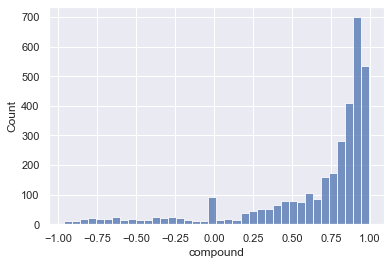

In [208]:
# Visualising the compound scores
sns.histplot(tourist_df1['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

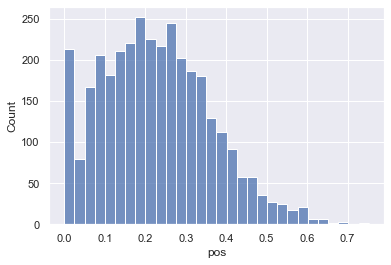

In [209]:
# Visualising the positive scores
sns.histplot(tourist_df1['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

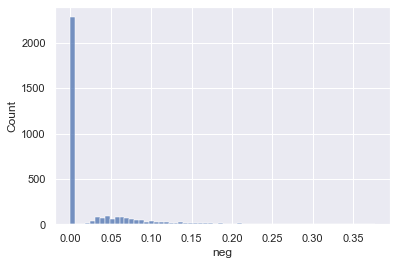

In [210]:
# Visualising the negative scores
sns.histplot(tourist_df1['neg'])

### Compound Score Classification

In [211]:
# Defining a function based on the compound score between -0.05 and 0.05
def Review(x):
    if x['compound'] > 0.05:
        return 'Positive'
    elif x['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [212]:
# Creating'sentiment'column
tourist_df1['Sentiment'] = tourist_df1[['compound']].apply(Review, axis=1)
tourist_df1.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Length of Reviews,compound,neg,neu,pos,Sentiment
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...,262,0.8674,0.0,0.821,0.179,Positive
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...,234,0.4939,0.0,0.903,0.097,Positive
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th...",294,0.9839,0.0,0.543,0.457,Positive
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...,257,0.9626,0.0,0.675,0.325,Positive
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...,165,0.9258,0.0,0.684,0.316,Positive


In [213]:
# Counting the distinct values in the sentiment column
tourist_df1['Sentiment'].value_counts()

Positive    2962
Negative     309
Neutral      108
Name: Sentiment, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


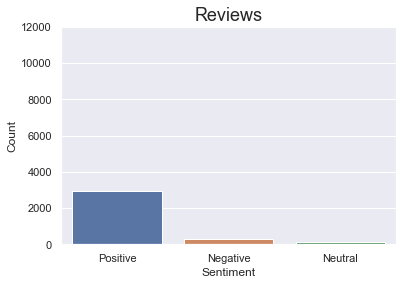

In [214]:
# Visualising the sentiment column
sns.set(style="darkgrid") #style the plot background to become a grid
sns.countplot(tourist_df1['Sentiment'])
plt.ylim(0,12000)
plt.title('Reviews', fontsize= 18)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [215]:
# Negative reviews we have in each Hotel/Restaurant
(tourist_df1['compound']< -0.05).groupby(tourist_df1['Hotel/Restaurant name']).sum().sort_values(ascending=False)

Hotel/Restaurant name
Da Mario                               29
Patong Seafood                         27
Mr Good's Seafood                      25
99 Seafood                             22
Malila Restaurant                      21
Savoey Restaurant                      21
Molly's Tavern                         19
Sabai Sabai                            15
No.6 Restaurant                        14
Royal India Restaurant Patong          12
Lucky 13 Sandwich Patong               10
Roma Ristorante & Pizzeria Da Mauro    10
Pizzeria Hut 1                          9
Linda Seafood                           8
Restaurant Break Point                  8
Sabai Beach Restaurant                  6
Restaurant at Lillo Island Resort       5
Pum Thai Restaurant                     5
Poo Nurntong Restaurant                 5
Patong Corner Restaurant                5
Little Tiger                            5
Rosco's Restaurant & Sports Bar         4
Natural Efe Macrobiotic World           4
Sala Bua Res

In [216]:
# Percentage of total reviews

percent_negative = pd.DataFrame((tourist_df1['compound'] < -0.05).groupby(tourist_df1['Hotel/Restaurant name']).sum()
                                /tourist_df1['Hotel/Restaurant name'].groupby(tourist_df1['Hotel/Restaurant name']).count()*100,
                                columns= ['% Negative Reviews']).sort_values(by= '% Negative Reviews')

percent_negative
                                

,% Negative Reviews
Hotel/Restaurant name,
Sam's Steaks and Grill,1.000000
Salute Italian Restaurant,2.000000
S&G Family Restaurant,3.000000
Rustic - Eatery & Bar,3.000000
"Ruen Thai, Patong",3.000000
3 Spices Restaurant,4.000000
Sala Bua Restaurant,4.000000
Rosco's Restaurant & Sports Bar,4.000000
Natural Efe Macrobiotic World,4.000000


<AxesSubplot:xlabel='% Negative Reviews', ylabel='Hotel/Restaurant name'>

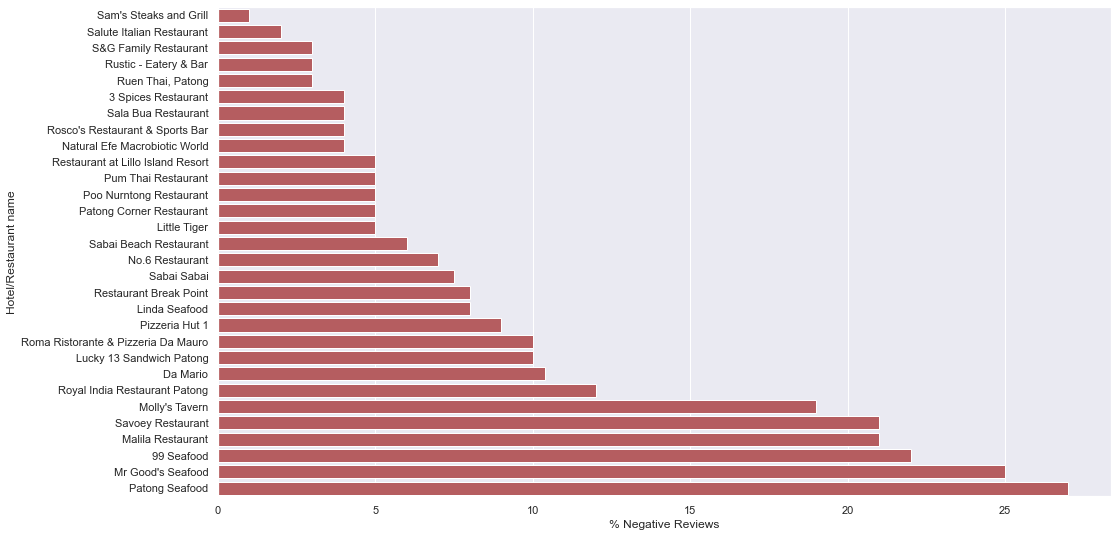

In [217]:
plt.figure(figsize=(16,9))

sns.barplot(data=percent_negative, x = '% Negative Reviews', y=percent_negative.index, color='r')


# Viewing the positive and negative words using wordcloud

In [218]:
tourist_df1['Processed_Review'] = tourist_df['Review']

tourist_df1_positive_subset = tourist_df1.loc[(tourist_df1['Hotel/Restaurant name']== 'Patong Seafood')
                                           &  (tourist_df1['compound']> 0.05),:]

tourist_df1_negative_subset = tourist_df1.loc[(tourist_df1['Hotel/Restaurant name']== 'Patong Seafood')
                                           &  (tourist_df1['compound']< -0.05),:]

tourist_df1_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,Length of Reviews,compound,neg,neu,pos,Sentiment,Processed_Review
52560,rn570982031,"Reviewed April 4, 2018",Patong,Patong Seafood,We were recommended this restaurant by a local...,136,0.5577,0.101,0.642,0.257,Positive,"[recommend, local, delici, servic, good, ladi,..."
52563,rn563282161,"Reviewed February 27, 2018",Patong,Patong Seafood,We visited for dinner one night and ordered tw...,251,0.4404,0.045,0.852,0.103,Positive,"[visit, dinner, one, night, order, two, noodl,..."
52564,rn557370458,"Reviewed January 30, 2018",Patong,Patong Seafood,"visited this place fr lunch ,food was fresh ,a...",137,0.8652,0.000,0.694,0.306,Positive,"[visit, place, fr, lunch, food, fresh, dish, o..."
52567,rn549709264,"Reviewed December 28, 2017",Patong,Patong Seafood,Went to this restaurant tonight and what a let...,314,0.6369,0.000,0.885,0.115,Positive,"[went, tonight, letdown, servic, disgrac, grum..."
52570,rn544006302,"Reviewed November 29, 2017",Patong,Patong Seafood,"Looking for a late lunch, we stumbled on this ...",247,0.3716,0.000,0.940,0.060,Positive,"[look, late, lunch, stumbl, great, view, beach..."


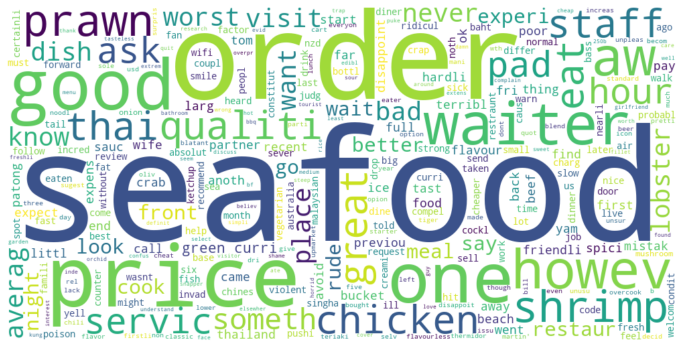

In [219]:
# wordcloud of words from negative reviews by Hotel/Resturant

neg_tokens = [word for review in tourist_df1_negative_subset['Processed_Review'] for word in review]

wordcloud = WordCloud(background_color ='white',width=1000,height=500,max_words=500,min_font_size=5).generate_from_text(' '.join(neg_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

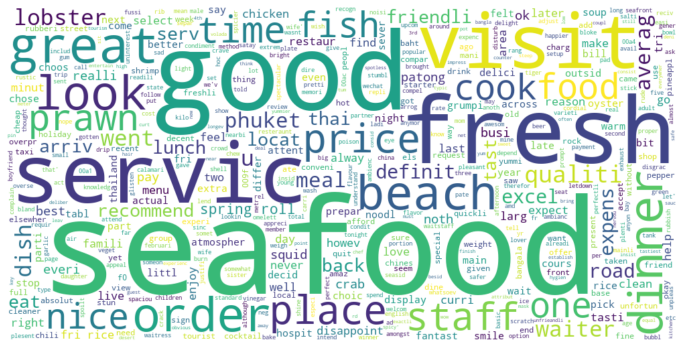

In [220]:
# wordcloud of words from positive reviews by Hotel/Resturant

pos_tokens = [word for review in tourist_df1_positive_subset['Processed_Review'] for word in review]

wordcloud = WordCloud(background_color ='white',width=1000,height=500,max_words=500,min_font_size=5).generate_from_text(' '.join(pos_tokens))

#Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [239]:
# use the nltk FreqDist and then tabulate

from nltk.probability import FreqDist

pos_freqdist = FreqDist(pos_tokens)

pos_freqdist.tabulate(100)

   seafood       good      fresh     servic      visit      great     dinner      order       look      beach      place      price      staff      prawn       time        one       food      would       fish       nice       cook    qualiti       dish       went     waiter    lobster       meal     phuket     averag    definit        fri       rice       road       like     expens      excel  recommend      lunch      arriv          u       thai     spring       roll       tast       serv   friendli      locat        eat       back      everi       best     realli        pay     patong       busi      squid       crab         ok       noth       help        two      howev      never      curri     select disappoint       make      enjoy          2    chicken    restaur       live       feel       menu      minut      later        tri      right       find        day     famili      alway       well       last         go     reason       area     expect       larg      tasti      clean

In [222]:
# use the nltk FreqDist and then tabulate

from nltk.probability import FreqDist

neg_freqdist = FreqDist(neg_tokens)

neg_freqdist.tabulate(10)

seafood   order   price     one    good  waiter    like   howev      aw  shrimp 
     11      10       9       6       6       6       6       5       5       5 


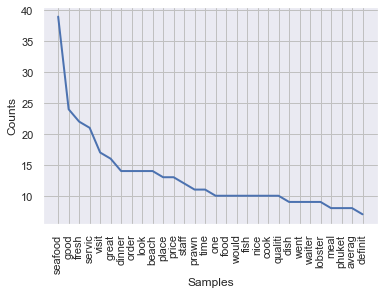

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [223]:
pos_freqdist.plot(30)

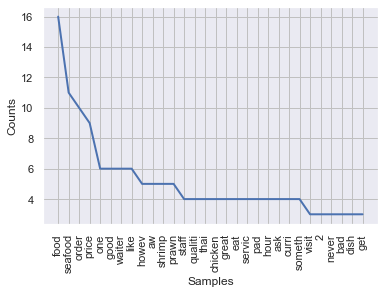

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [76]:
neg_freqdist.plot(30)

### Creating a model

In [104]:
# Instantiating the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [105]:
# Creating a frequency matrix
X = vectorizer.fit_transform(tourist_df['Review'].map(' '.join))
X =pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
X.head()

,00,000,0080,0081,0085,008a,008b,008c,008d,008e,...,yummier,yummiest,yung,ywo,za,zeland,zen,zero,zjesz,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Segregation of Training and Test Data
from sklearn.model_selection import train_test_split

y = tourist_df1['Sentiment']

X_train, X_test, y_train, y_test  = train_test_split(
    X, y, train_size = 0.8, test_size=0.2,random_state=99)


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

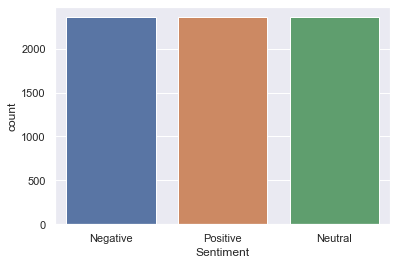

In [107]:
# Class Imbalance 
from imblearn.over_sampling import SMOTE

resampler = SMOTE(random_state=0)
X_train_smote, y_train_smote = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_smote)

### Multinomian Naive_Bayes

In [108]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)


MultinomialNB()

In [109]:

y_pred = model.predict(X_test)
# Computing the accuracy an Making the Confusion Matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print("accuracy:%.2f\n\n"%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm,"\n\n")
print("--------------------------------------------------------------------")
result=metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(result)

accuracy:0.91


Confusion Matrix:
[[ 35   1  17]
 [  3   4  13]
 [ 21   3 579]] 


--------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

    Negative       0.59      0.66      0.62        53
     Neutral       0.50      0.20      0.29        20
    Positive       0.95      0.96      0.96       603

    accuracy                           0.91       676
   macro avg       0.68      0.61      0.62       676
weighted avg       0.91      0.91      0.91       676



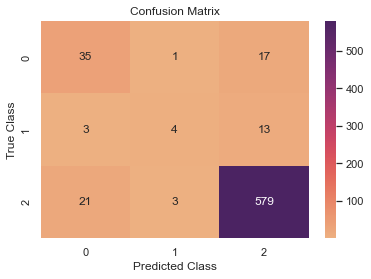

In [110]:
ax = sns.heatmap(cm, cmap="flare", annot=True, fmt="d")

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)
plt.show()

### Hyperparameter tuning

In [231]:
# Defining a function to analyse the grid results 
def print_results(results) :
    print("Best Parameters: {}\n".format(results.best_params_))
    means = results.cv_results_["mean_test_score"]
    stds = results.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std * 2, 3), params))

### Random Forest Classifier

In [232]:
rf = RandomForestClassifier()
parameters = {
    "n_estimators" : [5,50,250],
    "max_depth" : [2,4,8,16,32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train_smote, y_train_smote.ravel())
print_results(cv)

Best Parameters: {'max_depth': None, 'n_estimators': 250}

0.455 (+/-0.069) for {'max_depth': 2, 'n_estimators': 5}
0.687 (+/-0.056) for {'max_depth': 2, 'n_estimators': 50}
0.731 (+/-0.07) for {'max_depth': 2, 'n_estimators': 250}
0.555 (+/-0.063) for {'max_depth': 4, 'n_estimators': 5}
0.721 (+/-0.062) for {'max_depth': 4, 'n_estimators': 50}
0.743 (+/-0.044) for {'max_depth': 4, 'n_estimators': 250}
0.632 (+/-0.035) for {'max_depth': 8, 'n_estimators': 5}
0.743 (+/-0.081) for {'max_depth': 8, 'n_estimators': 50}
0.77 (+/-0.071) for {'max_depth': 8, 'n_estimators': 250}
0.704 (+/-0.071) for {'max_depth': 16, 'n_estimators': 5}
0.782 (+/-0.077) for {'max_depth': 16, 'n_estimators': 50}
0.795 (+/-0.09) for {'max_depth': 16, 'n_estimators': 250}
0.758 (+/-0.038) for {'max_depth': 32, 'n_estimators': 5}
0.837 (+/-0.073) for {'max_depth': 32, 'n_estimators': 50}
0.838 (+/-0.082) for {'max_depth': 32, 'n_estimators': 250}
0.847 (+/-0.06) for {'max_depth': None, 'n_estimators': 5}
0.888 (+/

In [235]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_selectedfeatures = RandomForestClassifier(n_estimators=250, max_depth = None)
rf_selectedfeatures.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=250)

Accuracy Score: 89.50%


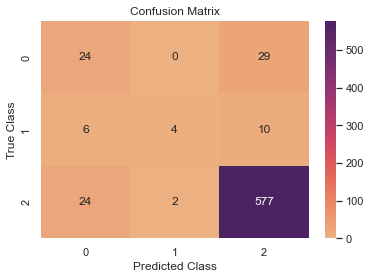

In [237]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
# Make predictions on the test data 
y_pred = rf_selectedfeatures.predict(X_test) 
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%") 
cm = confusion_matrix(y_test,y_pred) 
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d') 

plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

In [238]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.44      0.45      0.45        53
     Neutral       0.67      0.20      0.31        20
    Positive       0.94      0.96      0.95       603

    accuracy                           0.89       676
   macro avg       0.68      0.54      0.57       676
weighted avg       0.89      0.89      0.89       676

